# numpy's FFT: Calculate, scale and fold

Imports
-------

In [60]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [6, 3]

Create a Test Signal
--------------------
We create a test signal $x$ with two tones at $f_1$and $f_2$ and amplitudes $A_1$ resp. $A_2$, sampled with $f_S$. Our goal is to extract the correct frequencies and amplitudes from the FFT.

In [61]:
N = 100 # number of DFT points
f_S = 50.0 # Hz
f_1 = 1.0 # Hz
f_2 = 10 # Hz
A_1 = 5
A_2 = 2
#t = np.arange(0.0, 2.0, 1. / f_S)
t = np.linspace(0.0, N / f_S, num = N, endpoint=False)
x = A_1 * np.sin(2 * np.pi * f_1 * t) + A_2 * np.sin(2 * np.pi * f_2 * t)
print(x)

[  0.00000000e+00   2.52877920e+00   2.41901994e+00   6.65052259e-01
   5.06655338e-01   2.93892626e+00   5.32484856e+00   5.02813672e+00
   3.04606912e+00   2.62202223e+00   4.75528258e+00   6.81354929e+00
   6.16570415e+00   3.81456314e+00   3.00932322e+00   4.75528258e+00
   6.42624829e+00   5.39721013e+00   2.67699571e+00   1.52062250e+00
   2.93892626e+00   4.31088140e+00   3.01619327e+00   6.78789312e-02
  -1.27544686e+00  -1.83697020e-15   1.27544686e+00  -6.78789312e-02
  -3.01619327e+00  -4.31088140e+00  -2.93892626e+00  -1.52062250e+00
  -2.67699571e+00  -5.39721013e+00  -6.42624829e+00  -4.75528258e+00
  -3.00932322e+00  -3.81456314e+00  -6.16570415e+00  -6.81354929e+00
  -4.75528258e+00  -2.62202223e+00  -3.04606912e+00  -5.02813672e+00
  -5.32484856e+00  -2.93892626e+00  -5.06655338e-01  -6.65052259e-01
  -2.41901994e+00  -2.52877920e+00  -6.12323400e-15   2.52877920e+00
   2.41901994e+00   6.65052259e-01   5.06655338e-01   2.93892626e+00
   5.32484856e+00   5.02813672e+00

Plot the time signal
----

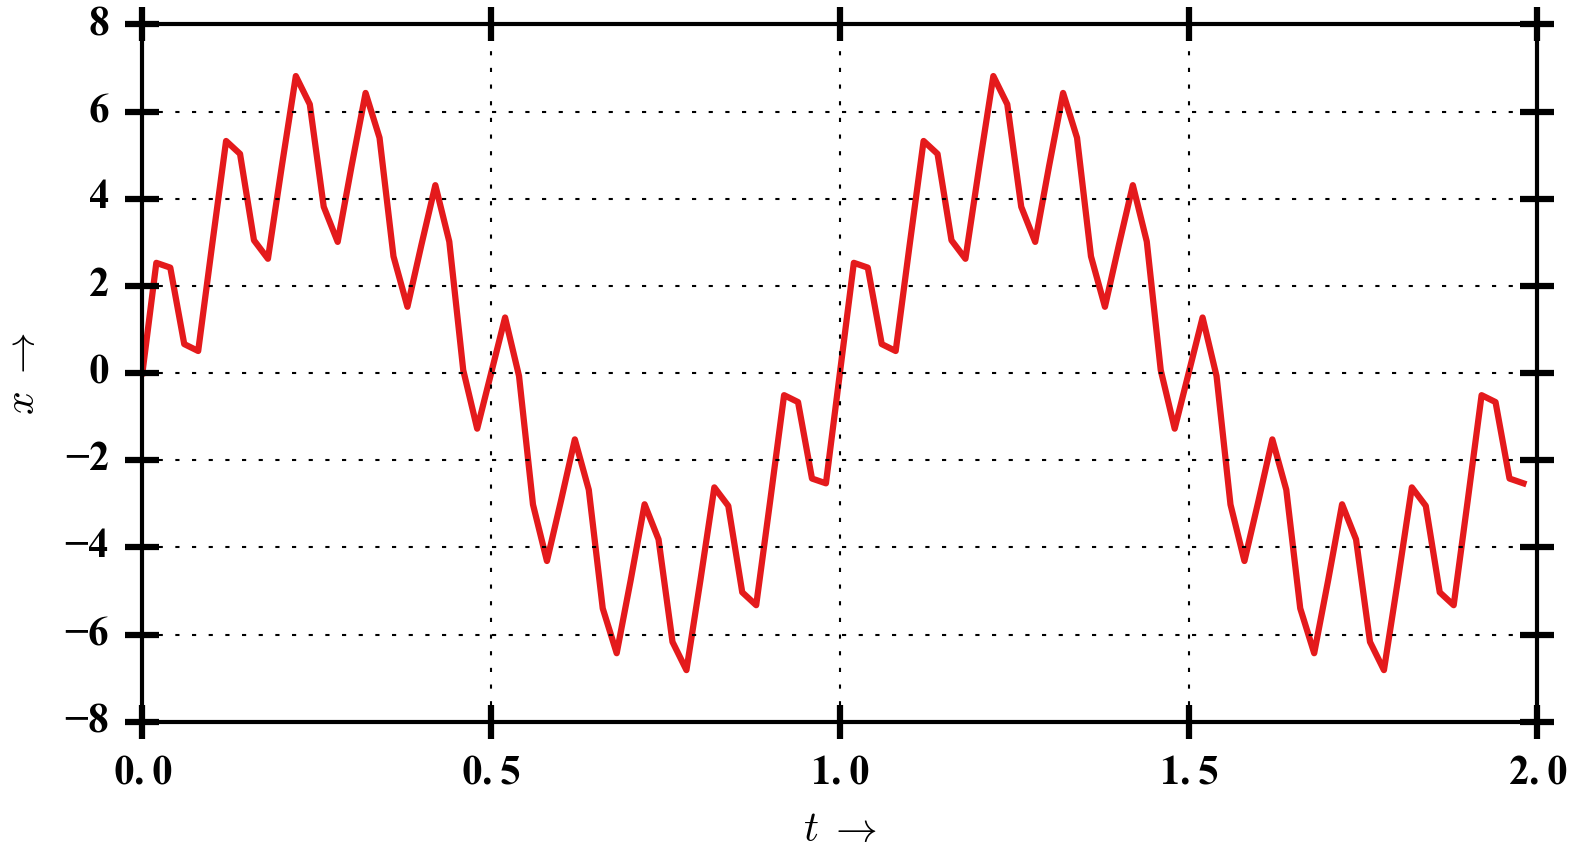

In [62]:
plt.plot(t, x)
plt.xlabel(r"$t \; \rightarrow$")
plt.ylabel(r"$x \; \rightarrow$"); # semicolon suppresses status message

Compute the FFT
---------------
We start by simply using `fft(x)` and look what's happening:

D:\Programme\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


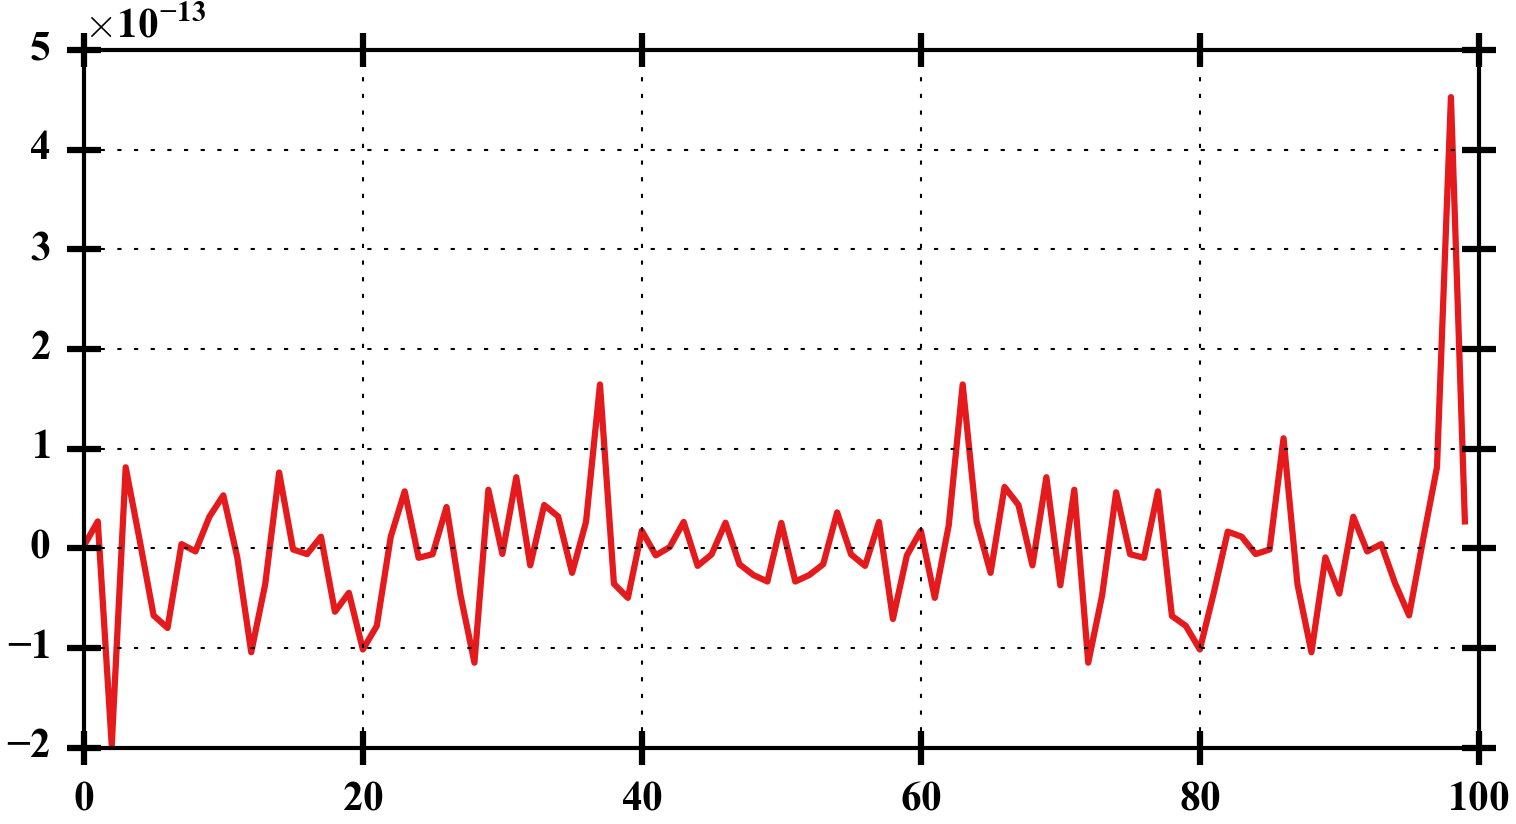

In [63]:
fft_x = np.fft.fft(x)
plt.plot(fft_x);

Hm, pretty close to zero - not quite what we expected. We also got a warning message about "casting complex values to real" - let's take a look at the data:

In [64]:
real_c = np.real_if_close

for i in range(N//2):
    print("{0}\t{1:25.5g}\t{2}\t{3:25.5g}".format(i, (fft_x[i]), N//2 + i, (fft_x[N//2 + i])))

0	            2.5161e-15+0j	50	   2.5561e-14+8.3178e-15j
1	   2.7067e-14-1.0659e-14j	51	   -3.325e-14+5.5419e-14j
2	         -1.9773e-13-250j	52	  -2.6788e-14-5.5472e-14j
3	   8.1375e-14+6.7867e-15j	53	   -1.5906e-14-1.995e-14j
4	    8.4452e-15+7.762e-14j	54	   3.6099e-14+1.9385e-15j
5	  -6.7255e-14+7.6732e-14j	55	  -6.0589e-15-2.0532e-14j
6	   -7.9888e-14-1.487e-13j	56	  -1.7539e-14-2.9252e-15j
7	   4.2888e-15+2.6552e-14j	57	   2.6518e-14-2.8123e-14j
8	  -3.0445e-15-8.6092e-15j	58	  -7.0864e-14+6.3949e-14j
9	   3.1747e-14+5.8591e-15j	59	  -7.0102e-15-2.7882e-14j
10	     5.322e-14+8.842e-15j	60	   1.7688e-14-1.4211e-14j
11	  -9.0463e-15+8.2106e-14j	61	  -4.9662e-14-4.8507e-14j
12	  -1.0422e-13+4.7437e-15j	62	   2.3156e-14-1.1989e-13j
13	  -3.6125e-14-8.7588e-14j	63	   1.6451e-13-1.0288e-14j
14	   7.6124e-14-1.4645e-14j	64	    2.6599e-14+7.395e-14j
15	  -1.0924e-15+1.0177e-14j	65	  -2.4557e-14+5.4315e-14j
16	   -5.733e-15+2.5638e-14j	66	   6.1651e-14-5.5678e-14j
17	   1.1714e-14+1.6153e

In [65]:
n = np.arange(10)
x = np.sin(np.pi * n / 5)
X = np.fft.fft(x)

# doesn't work; small imaginary parts are only suppressed if ALL elements are "nearly" real?
print(np.real_if_close(X))

# does work, but formatting is ugly
for i in range(10):
    print(np.real_if_close(X[i]))

for i in range(10):
    print("{0:5.5g}".format(X[i]))
    
# doesn't work, "non-empty format string passed to object.__format__"
for i in range(10):
    print("{0:g}".format(np.real_if_close(X[i])))

[  1.22464680e-16 +0.00000000e+00j  -4.11926757e-15 -5.00000000e+00j
   1.22464680e-16 -2.11176968e-16j  -5.56473781e-17 -2.22044605e-15j
   1.22464680e-16 -1.30514544e-16j   1.71803417e-16 +8.88178420e-16j
   1.22464680e-16 +1.30514544e-16j   3.40401591e-16 +0.00000000e+00j
   1.22464680e-16 +2.11176968e-16j   3.05038654e-15 +5.00000000e+00j]
1.2246467991473532e-16
(-4.119267568565299e-15-5j)
1.2246467991473532e-16
-5.564737814014002e-17
1.2246467991473532e-16
1.7180341650925867e-16
1.2246467991473532e-16
3.4040159136291664e-16
1.2246467991473532e-16
(3.050386539259587e-15+5.000000000000002j)
1.2246e-16+0j
-4.1193e-15-5j
1.2246e-16-2.1118e-16j
-5.5647e-17-2.2204e-15j
1.2246e-16-1.3051e-16j
1.718e-16+8.8818e-16j
1.2246e-16+1.3051e-16j
3.404e-16+0j
1.2246e-16+2.1118e-16j
3.0504e-15+5j


TypeError: non-empty format string passed to object.__format__

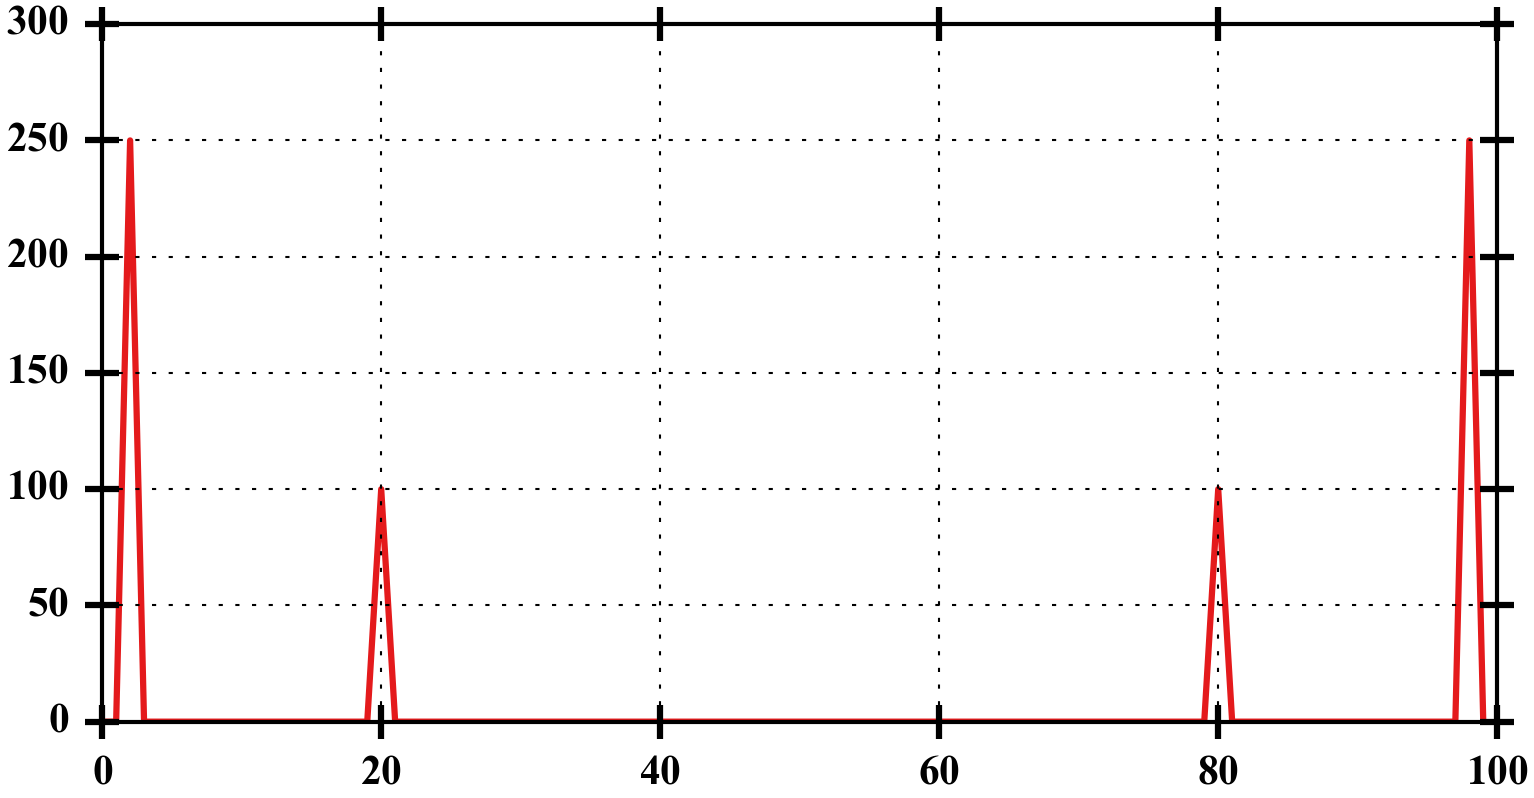

In [66]:
plt.plot(np.abs(fft_x));

That's much better but amplitude and frequency scaling still are not as expected. The default frequency axis is just the bin number, running from $0 \ldots N_{FFT} - 1$, representing frequencies $0 \ldots f_S - f_S/N$. This can be fixed using the helper function `fftfreq`, calculating frequencies for the bins in the proper order (print out the result of `fftfreq` to check). The proper amplitude scaling is obtaining by dividing through the number of FFT points:

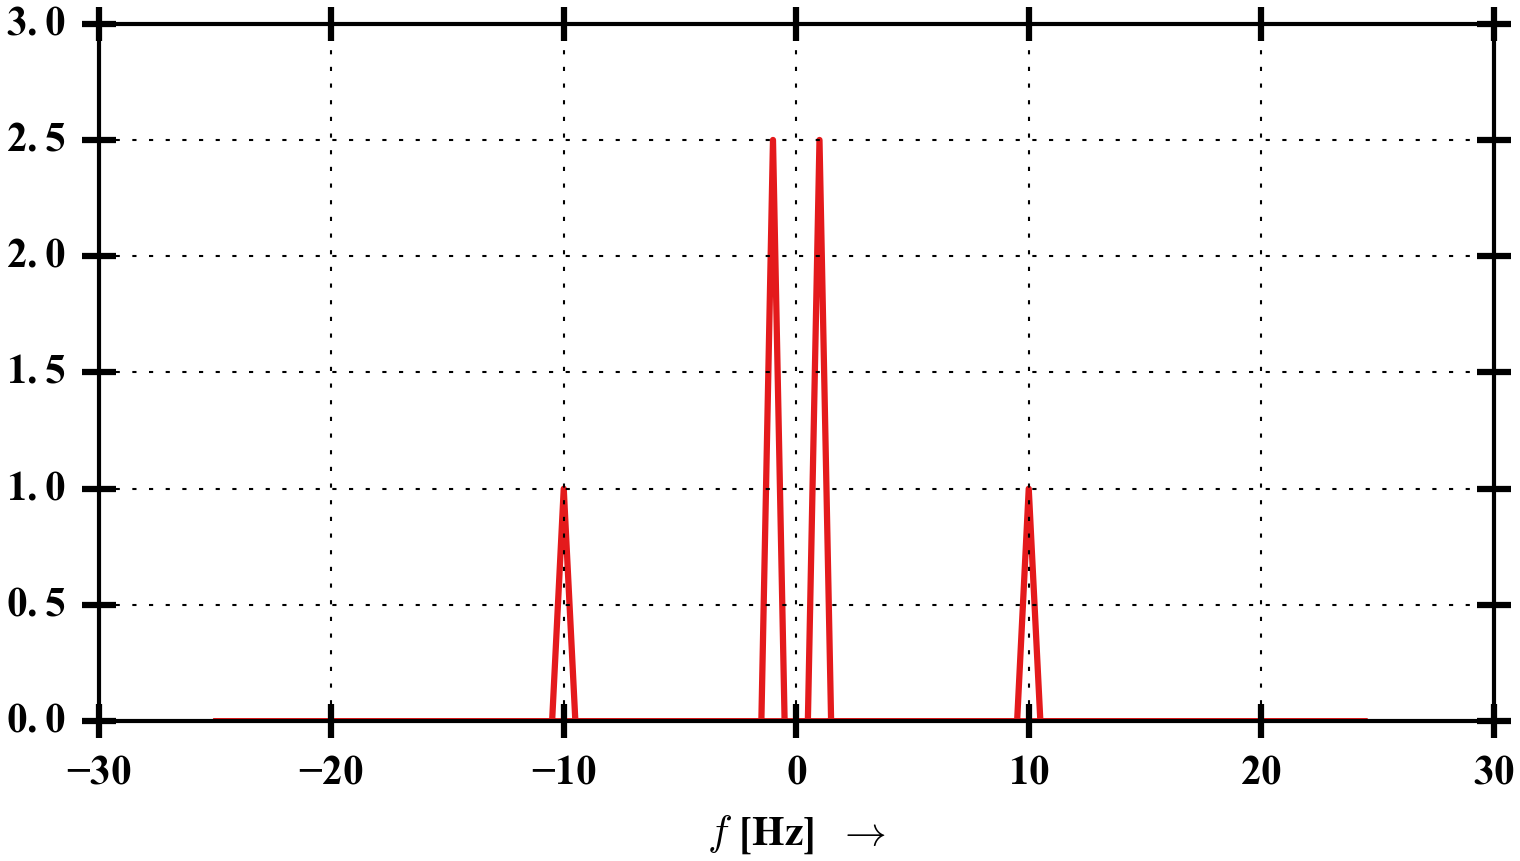

In [67]:
f = np.fft.fftfreq(N, 1/f_S) # calculate frequency points
plt.plot(f, np.abs(fft_x)/N)
plt.xlabel(r"$f$ [Hz]  $\rightarrow$");

Swap Half Spaces
----------------
Note that frequencies in the FFT and the `freq` vector go from zero to some larger positive number then from a large negative number back toward zero. We can swap that so that the DC component is in the center of the vector while maintaining a two-sided spectrum.

In [ ]:
fft_x_shifted = np.fft.fftshift(fft_x)
freq_shifted = np.fft.fftshift(f)
plt.plot(freq_shifted, np.abs(fft_x_shifted))
plt.xlabel("Frequency (Hz)");

Fold Negative Frequencies and Scale
------------------------------
It's actually more common to look at just the first half of the unshifted FFT and frequency vectors and fold all the amplitude information into the positive frequencies. Furthermore, to get ampltude right, we must normalize by the length of the original FFT. Note the factor of $2/n$ in the following which accomplishes both the folding and scaling.

In [ ]:
half_n = np.ceil(n/2.0)
fft_x_half = (2.0 / n) * fft_x[:half_n]
freq_half = freq[:half_n]

In [ ]:
plt.plot(freq_half, np.abs(fft_x_half))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

Now the spectrum contains spikes at the correct amplitudes at only positive frequencies, which are the only ones with physicality.